In [4]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
import pandas as pd 
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

data_directory = "../../csv-data/"

## Demande PR 110

* C'est quoi le nombre maximum et moyen de substances par élément ? Un trop grand nombre de substances risque de créer une colonne trop grande et trop d'espace blanc. Potentiellement cette info on peut la bouger à un display en ligne.
* Combien d'éléments n'ont ni commentaires publics, ni description ? L'affichage est assez vide quand c'est le cas. À enrichir par la suite avec d'autres composants une fois qu'on aura la liaison avec les personas, etc.


In [17]:
substance_df = pd.read_csv(os.path.join(data_directory,"REF_ICA_SUBSTANCE_ACTIVE.csv"))

substance_df_to_append = substance_df[['SBSACT_COMMENTAIRE_PUBLIC', 'SBSACT_COMMENTAIRE_PUBLIC_EN']]
substance_df_to_append.columns = ['COMMENTAIRE_PUBLIC', 'COMMENTAIRE_PUBLIC_EN']
substance_df_to_append['TYPE'] = 'substance'


plant_df = pd.read_csv(os.path.join(data_directory, "REF_ICA_PLANTE.csv"))

plant_df_to_append = plant_df[['PLTE_COMMENTAIRE_PUBLIC', 'PLTE_COMMENTAIRE_PUBLIC_EN']]
plant_df_to_append.columns = ['COMMENTAIRE_PUBLIC', 'COMMENTAIRE_PUBLIC_EN']
plant_df_to_append['TYPE'] = 'plante'


In [31]:
ingredient_df = pd.read_csv(os.path.join(data_directory, "REF_ICA_INGREDIENT_AUTRE.csv"))
ingredient_df_to_append = ingredient_df[['INGA_COMMENTAIRE_PUBLIC', 'INGA_COMMENTAIRE_PUBLIC_EN', 'INGA_DESCRIPTION', 'INGA_DESCRIPTION_EN']]

ingredient_df_to_append.columns = ['COMMENTAIRE_PUBLIC', 'COMMENTAIRE_PUBLIC_EN', 'DESCRIPTION', 'DESCRIPTION_EN']
ingredient_df_to_append['TYPE'] = 'ingredient'


In [5]:
morganisme_df = pd.read_csv(os.path.join(data_directory, "REF_ICA_MICRO_ORGANISME.csv"))
morganisme_df_to_append = morganisme_df[['MORG_COMMENTAIRE_PUBLIC', 'MORG_COMMENTAIRE_PUBLIC_EN']]

morganisme_df_to_append.columns = ['COMMENTAIRE_PUBLIC', 'COMMENTAIRE_PUBLIC_EN']
morganisme_df_to_append['TYPE'] = 'micro-organisme'


In [6]:
all_ingredient_df = pd.concat([plant_df_to_append, morganisme_df_to_append, ingredient_df_to_append, substance_df_to_append])


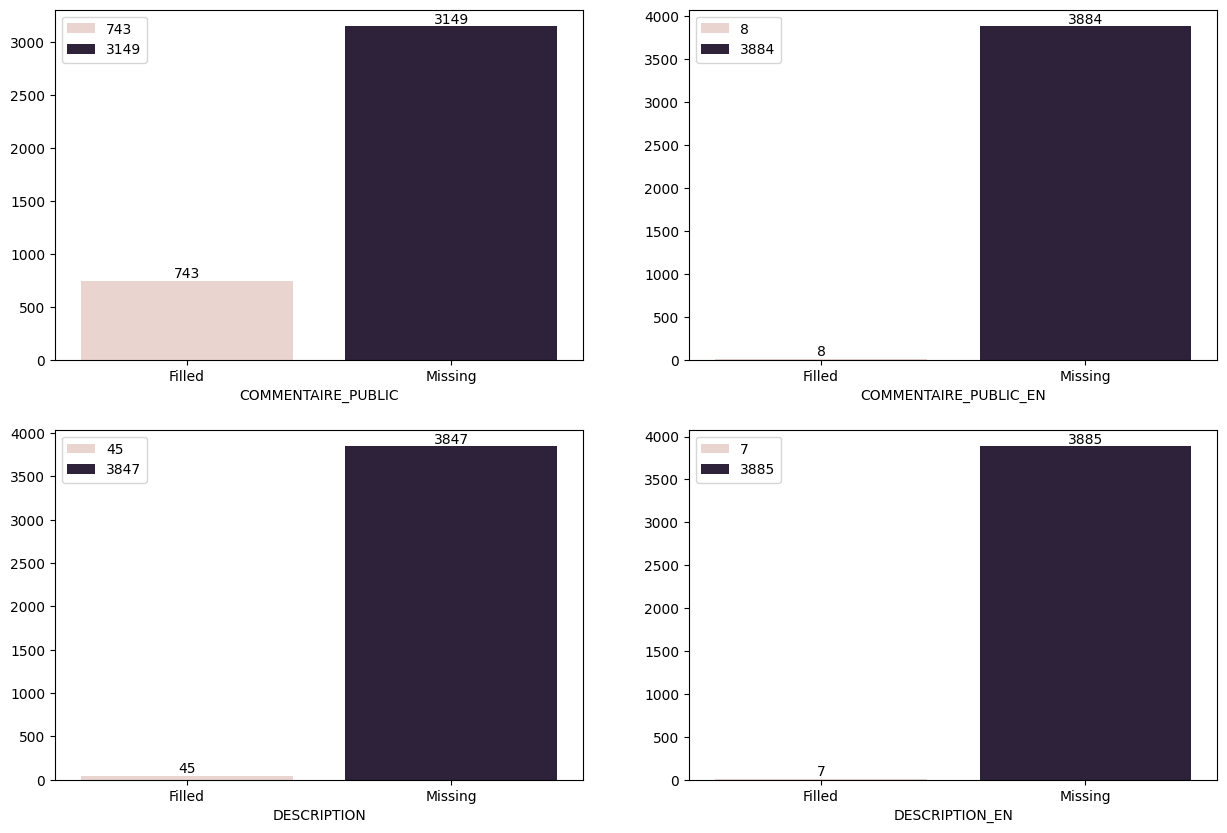

In [7]:
filled_all_ingredient_df = all_ingredient_df.copy()
for column in all_ingredient_df.columns:
    filled_all_ingredient_df[column] = all_ingredient_df[column].apply(lambda x: "Filled" if not pd.isnull(x) else np.nan).fillna("Missing")

all_ingredient_df
fig, ax = plt.subplots(2, 2, figsize = (15, 10))
for i, subplots in zip (filled_all_ingredient_df[['COMMENTAIRE_PUBLIC',	'COMMENTAIRE_PUBLIC_EN', 'DESCRIPTION', 'DESCRIPTION_EN'	]], ax.flatten()):  
  s = filled_all_ingredient_df[i].value_counts().rename_axis(i).rename('count')
  op = sns.barplot(x=s.index, y=s.values, hue=s.values, order=['Filled', 'Missing'], ax = subplots)
  # ajout des count en légende sur chaque bar
  for container in op.containers:
    op.bar_label(container)
plt.show()


In [18]:
substance_df.columns

Index(['SBSACT_IDENT', 'STINGSBS_IDENT', 'TYSUBST_IDENT', 'UNT_IDENT',
       'SBSACT_LIBELLE', 'SBSACT_LIBELLE_EN', 'SBSACT_COMMENTAIRE_PUBLIC',
       'SBSACT_COMMENTAIRE_PUBLIC_EN', 'SBSACT_COMMENTAIRE_PRIVE',
       'SBSACT_COMMENTAIRE_PRIVE_EN', 'SBSACT_NUMERO_CAS', 'SBSACT_SOURCE',
       'SBSACT_SOURCE_EN', 'SBSACT_QUANTITE_ARENSEIGNER', 'SBSACT_QTE_MIN',
       'SBSACT_QTE_MAX', 'SBSACT_NUM_EINECS', 'SBSACT_APPORT_REF',
       'SBSACT_OBSOLET', 'SBSACT_ORDRE'],
      dtype='object')

## Les différents champs de la table SUBSTANCE SICCRF sont-ils utilisés ?
Pour PR211

In [19]:
substance_df['SBSACT_QTE_MIN'].unique()

array([nan])

In [42]:
print(len(substance_df['SBSACT_SOURCE'].unique()))

substance_df['SBSACT_SOURCE'].unique()

15


array([nan, 'aloines présente dans les plantes du genre Aloe',
       'Ecklonia cava ', 'acide palmitique',
       'Sel disodique de pyrroloquinoléine-quinone', 'Colostrum',
       'N° CAS : 122628-50-6 - poudre brun rougeâtre produite par la bactérie non génétiquement modifiée Hyphomicrobium denitrifi\xadcans (souche CK-275)  ',
       'Num : 848127-67-3',
       'Oligosaccharide cyclique composé de 8 sous-unités glucopyranoses liées en a-(1,4. La gamma-cyclodextrine (ou gamma-dextrine, cycloocto-amylose, cyclomalto-octaose) est produite à partir de sirop d’amidon de maïs hydrolysé par l’action de l’enzyme cyclodextrine-glucosyltransférase (CGTase) (EC 2.4.1.19, CAS 9030-09-5), enzyme amylolytique. La CGTase est produite par une souche modifiée d’Escherichiacoli.',
       "Le pain d'abeille est un mélange de pelotes de pollen, de miel et de ferments lactiques qui sert de nourriture de base aux larves des abeilles sociales et solitaires, Bourdons et autres Apoidea.",
       '(2S)-2-{[(

In [41]:
print(len(substance_df['SBSACT_SOURCE_EN'].unique()))
substance_df['SBSACT_SOURCE_EN'].unique()

6


array([nan, 'Ecklonia cava ', 'palmitic acid',
       'Pyrroloquinoline quinone disodium salt',
       'Pterostilbene is found in almonds, various Vaccinium berries (including blueberries, grape leaves and vines,and Pterocarpus marsupium heartwood.',
       'Wikipedia : Sodium butyrate is a compound with formula Na(C3H7COO). It is the sodium salt of butyric acid. The compound is found in human diet, notably produced in large amounts from dietary fiber in the gut and present in Parmesan cheese and butter. Nevertheless, the most common source of sodium butyrate in the gut is from consumption of legumes.'],
      dtype=object)

In [40]:
print(len(substance_df['SBSACT_COMMENTAIRE_PUBLIC_EN'].unique()))
substance_df['SBSACT_COMMENTAIRE_PUBLIC_EN'].unique()

4


array([nan,
       'Novel Food - Conditions of use in : COMMISSION IMPLEMENTING REGULATION (EU) 2018/112',
       'Oenothein A and oenothein B, considered responsible for the activity-decrease of aromatase and 5-alpha-reductase present in prostate cells. (Belfrit)',
       "Informations issues d'un article scientifique publié sur le Shilajit (https://pubmed.ncbi.nlm.nih.gov/23733436/) : Various research studies indicate that shilajit exhibits antioxidant, anti-inflammatory, adaptogenic, immunomodulatory, and anti-dyslipidemic properties. Animal and human studies indicate that shilajit enhances spermatogenesis. Furthermore, animal and human data support its use as a 'revitalizer', enhancing physical performance and relieving fatigue with enhanced production of ATP. Key constituents in shilajit responsible for these effects appear to be dibenzo-a-pyrones and fulvic acid and their derivatives."],
      dtype=object)

In [44]:
print(len(substance_df['SBSACT_COMMENTAIRE_PRIVE_EN'].unique()))

11


Conclusion : on supprime les éléments qui ont moins de 15 entrées :
* SBSACT_QTE_MIN
* SBSACT_SOURCE_EN
* SBSACT_COMMENTAIRE_PUBLIC_EN
* SBSACT_COMMENTAIRE_PRIVE_EN

## Les différents champs de la table INGREDIENT sont-ils utilisés ?
Pour PR211

In [35]:
ingredient_df['INGA_OBSERVATION'].unique()

array([nan, 'Origine : blé'], dtype=object)

In [45]:
print(len(ingredient_df['INGA_DESCRIPTION'].unique()))
ingredient_df['INGA_DESCRIPTION'].unique()

45


array([nan,
       '208-438-6 (cyanidine); 205-125-6 (péonidine); 208-437-0 (delphinidine); 211-403-8 (malvidine); 205-127-7 (pélargonidine); 215- 849-4 (pétunidine) Les anthocyanes sont obtenues par macération ou extraction à l’eau sulfitée, à l’eau acidifiée, à l’anhydride carbonique, au méthanol ou à l’éthanol à partir de souches de végétaux ou de fruits comestibles puis, au besoin, par concentration et/ou purification. Le principe colorant est l’anthocyanine.',
       'bêta-cyclodextrine', 'CAS Number: 2491-06-7',
       "L''amyloglucosidase (-D-1,4 glucane glucohydrolase) est une enzyme essentiellement produite par des moisissures du genre Aspergilus sp., Penicillium sp. et Rhizopus sp.",
       "L'extrait lipidique de krill de l'Antarctique (Euphausia superba) est produit à partir de krill surgelé ou séché, broyé et soumis à une extraction au moyen d'un solvant d'extraction autorisé (en vertu de la directive 2009/32/CE). Les protéines et les morceaux de krill sont éliminés de l'e

In [46]:
print(len(ingredient_df['INGA_DESCRIPTION_EN'].unique()))
ingredient_df['INGA_DESCRIPTION_EN'].unique()

8


array([nan, 'CAS Number 34369-07-8 ', 'Mineral wax',
       'Extract of three herbal roots (Cynanchum wilfordii Hemsley, Phlomis umbrosa Turcz. and Angelica gigas Nakai)',
       'Ecklonia cava phlorotannins', '(synthetic) ',
       'Microencapsulated Phenylcapsaicin',
       'Wikipedia : Sodium butyrate is a compound with formula Na(C3H7COO). It is the sodium salt of butyric acid. The compound is found in human diet, notably produced in large amounts from dietary fiber in the gut and present in Parmesan cheese and butter. Nevertheless, the most common source of sodium butyrate in the gut is from consumption of legumes.'],
      dtype=object)

In [47]:
print(len(ingredient_df['INGA_LIBELLE_EN'].unique()))
ingredient_df['INGA_LIBELLE_EN'].unique()

355


array([nan, 'Pteroylmonoglutamic acid', 'Beta-carotene',
       'Sodium bicarbonate', 'Zinc citrate', 'Ergocalciferol',
       'Phylloquinone', 'Acetylcysteine', 'Lipoic acid', 'Astaxanthin',
       'Betain', 'Caffeine', 'glucosamine chlorohydrate', 'Curcumin',
       'Dimethylethanolamine', 'Royal jelly', 'Glucosamin', 'Fish oil',
       'Hydroxymethylbutyrate', 'Hydroxytyrosol', 'Inulin',
       'Isomaltulose', 'Lactase', 'Lactitol', 'Melatonin',
       'N-acetylglucosamine', 'Phospholipids', 'Chondroitin sulfate',
       'Glucosamin sulfate', 'Medium Chain Triglycerides', 'Norvaline',
       'Zeolite', 'Polyethylene glycol', 'Anthocyanins', 'E171',
       'tricalcium phosphate', 'Beta-cyclodextrin',
       'Mono- and diglycerides of fatty acids', 'E551', 'dextrose',
       'glucose', 'Cod liver oil', 'Cod oil',
       'Medium Chain Triglyceride Oil', 'Honey', 'Propolis',
       'Hydroxypropyl Methyl Cellulose', 'Keratin', 'Hydrolyzed keratin',
       'Colostrum', 'Natural flavour',


On supprime les champs qui ont moins de 10 entrées :
* INGA_OBSERVATION
* INGA_DESCRIPTION_EN